In [8]:
from pettingzoo.butterfly import pistonball_v4
import numpy as np
from array2gif import write_gif
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

GRAYSCALE_WEIGHTS = np.array([0.299, 0.587, 0.114], dtype=np.float32)

# print(GRAYSCALE_WEIGHTS@np.array([68,76,77]))
def change_observation(obs):
    obs = (obs.astype(np.float32) @ GRAYSCALE_WEIGHTS).astype(np.uint8)
    return obs


DOWN = np.array([-1.])
UP = np.array([1.])
HOLD = np.array([0.])
count = 0


def policy(obs):
    global count
    obs = change_observation(obs)
    count += 1
    ball_vals = np.equal(obs, 137)
    first_loc = np.argmax(ball_vals, axis=1)
    if first_loc.any():
        first_loc_nonzero = np.where(first_loc == 0, 1000, first_loc)
        min_loc = np.min(first_loc_nonzero)
        max_loc = np.max(first_loc)
        if min_loc < 5:
            return UP
        elif max_loc > 80:
            return DOWN

    first_piston_vals = np.equal(obs, 73)
    uniques, counts = np.unique(obs, return_counts=True)
    pi1 = 200 - np.argmax(first_piston_vals[:,11])
    pi2 = 200 - np.argmax(first_piston_vals[:,51])
    pi3 = 200 - np.argmax(first_piston_vals[:,91])
    if pi1 == 200:
        action = DOWN
    elif pi3 == 200:
        action = UP
    else:
        return DOWN
        if pi2 > pi3:
            action = DOWN
        elif pi1 > pi2:
            action = UP
        elif pi1 + 1 < pi2:
            action = DOWN
        elif pi2 + 16 < pi3:
            action = UP
        else:
            action = UP

    return action


def main():
    env = pistonball_v4.env(n_pistons=20, local_ratio=0, time_penalty=-0.1, continuous=True, random_drop=True, random_rotate=True, ball_mass=0.75, ball_friction=0.3, ball_elasticity=1.5, max_cycles=125)
    total_reward = 0
    obs_list = []
    NUM_RESETS = 1
    i = 0
    for i in range(NUM_RESETS):
        env.reset()
        for agent in env.agent_iter():
            obs, rew, done, info = env.last()
            act = policy(obs) if not done else None
            env.step(act)
            total_reward += rew
            i += 1
            if i % (len(env.possible_agents)+1) == 0:
                obs_list.append(np.transpose(env.render(mode='rgb_array'), axes=(1, 0, 2)))

    env.close()
    print("average total reward: ", total_reward/NUM_RESETS)
    write_gif(obs_list, 'pistonball_ben.gif', fps=15)


In [9]:
main()

average total reward:  1951.999999999991


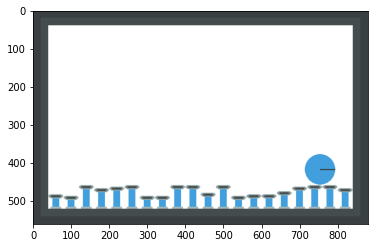

In [12]:
import matplotlib.pyplot as plt
plt.imshow(env.render(mode='rgb_array'))
plt.show()